In [22]:
import scrapy
from scrapy.crawler import CrawlerRunner, CrawlerProcess

from crochet import setup, wait_for
setup()
import re

import requests
from scrapy.http import TextResponse

import pandas as pd
import numpy as np

In [8]:
news = pd.read_csv('news_articles.csv')

In [10]:
news = news['0'].to_list()

In [15]:
news[0]

'https://www.ny1.com/nyc/all-boroughs/news/2022/05/02/biden-admin-investing-3-billion-in-electric-car-batteries'

In [18]:
article_1 = news[0]
r = requests.get(article_1)
response=TextResponse(r.url,body=r.text,encoding='utf-8')

In [20]:
response.css("p").extract_first()

'<p></p>'

In [21]:
#get authors-css
response.css("small::text").extract()

[]

In [28]:
class QuotesToCsv(scrapy.Spider):
    """scrape first line of  quotes from `wikiquote` by 
    Maynard James Keenan and save to json file"""
    name = "news article 1"
    # article url
    start_urls = [news[0],
    ]
    custom_settings = {
        'ITEM_PIPELINES': {
            '__main__.ExtractFirstLine': 1
        },
        'FEEDS': {
            'news.csv': {       # < CSV Name, I want to see if all scrraping can go to two CSV'
                'format': 'csv',
                'overwrite': True
            }
        }
    }

    def parse(self, response):
        """parse data from urls"""
        # html to Scrape - this is what im messing with currrently
        for quote in response.css('div.mw-parser-output > ul > li'):
            yield {'quote': quote.extract()}


class ExtractFirstLine(object):
    def process_item(self, item, spider):
        """text processing"""
        # change if you want, code is code, can always be renamed later
        lines = dict(item)["quote"].splitlines()
        first_line = self.__remove_html_tags__(lines[0])

        return {'quote': first_line}

    def __remove_html_tags__(self, text):
        """remove html tags from string"""
        html_tags = re.compile('<.*?>')
        return re.sub(html_tags, '', text)

@wait_for(10)
def run_spider():
    """run spider with MJKQuotesToCsv"""
    crawler = CrawlerRunner()
    d = crawler.crawl(QuotesToCsv)
    return d

In [37]:
response.text

'<!DOCTYPE HTML>\n\n\n\n\n\n<html lang="en">\n\n\n\n<head data-chartbeat-domain="ny1.com"><title>Biden to invest $3.1 billion in electric car batteries</title>\n<meta charset="utf-8"/>\n<meta http-equiv="x-ua-compatible" content="ie=edge"/>\n<meta name="viewport" content="width=device-width,initial-scale=1"/>\n\n\n    <meta name="description" content="The money, which comes from the Bipartisan Infrastructure Law, will focus on American manufacturing."/>\n\n\n\n\n\n\n\n\n<meta name="tp:preferredRuntimes" content="HTML5,Flash"/>\n<meta name="tp:PreferredFormats" content="MPEG4"/>\n<meta name="x-client-id" content="spectrumnews1.com"/>\n\n\n\n\n<meta name="keywords" content="All Markets - Rank Everywhere, Environment, Northern Kentucky, Columbus, APP  Environment, Washington DC Bureau, News, Kentucky, NNT, Austin Landis, Louisville, Cincinnati, APP  US &amp; World News, APP  For Your Consideration, Wisconsin, Ohio, Lexington, Dayton, APP Weather Stories, Bowling Green, Nationwide, APP Cli

In [88]:
response.css('div.text.parbase::text').getall()

[]

In [93]:
response.xpath('//*[contains(@class,"text parbase")]/descendant::text()').getall()

['The Biden administration on Monday ',
 'announced',
 ' a new $3.16 billion investment in American production of electric car batteries, part of the presidentâ\x80\x99s broader plan to expand the manufacturing of electric vehicles and charging networks and reduce U.S. reliance on oil.',
 '\n',
 '\n\n',
 'What You Need To Know',
 '\n',
 '\n',
 'The Biden administration on Monday announced a new $3.16 billion investment in domestic production of electric car batteries',
 '\n',
 '\n',
 'The money will come from the $1.2 trillion Bipartisan Infrastructure Law, which included $7 billion to strengthen the U.S. battery supply chain and $7.5 billion to build out the EV charging network across the United States',
 '\n',
 '\n',
 'The announcement is\xa0part of the presidentâ\x80\x99s broader plan to expand the manufacturing of electric vehicles and charging networks and reduce U.S. reliance on oil',
 '\n',
 '\n',
 'It comes as the price of gas has remained high and energy prices have surged due

In [95]:
scientific=pd.read_csv('scientific_articles.csv')
scientific=scientific['0'].to_list()

In [99]:
scientific[0]

'https://reader.elsevier.com/reader/sd/pii/S0921344921007266?token=561EB37B54F986FC096F4C09031657181CF25716229EEC72AB9C109969289957F0387C6C619E7A67EA777FF1970E7157&originRegion=us-east-1&originCreation=20220927161437'

In [116]:
article_1=scientific[2]
r = requests.get(article_1)
response=TextResponse(r.url,body=r.text,encoding='utf-8')

In [117]:
response.text

'%PDF-1.7\r%����\r\n1 0 obj\r<</AcroForm 5 0 R/Metadata 2 0 R/OCProperties<</D<</OFF[]/Order[]/RBGroups[]>>/OCGs[6 0 R]>>/Outlines 7 0 R/Pages 3 0 R/StructTreeRoot 8 0 R/Type/Catalog>>\rendobj\r5 0 obj\r<</DA(/Helv 0 Tf 0 g )/DR<</Encoding<</PDFDocEncoding 9 0 R>>/Font<</Helv 10 0 R/ZaDb 11 0 R>>>>/Fields[]>>\rendobj\r2 0 obj\r<</Length 3687/Subtype/XML/Type/Metadata>>stream\r\n<?xpacket begin="\ufeff" id="W5M0MpCehiHzreSzNTczkc9d"?>\n<x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="Adobe XMP Core 7.0-c000 79.1357c9e, 2021/07/14-00:39:56        ">\n   <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n      <rdf:Description rdf:about=""\n            xmlns:xmp="http://ns.adobe.com/xap/1.0/"\n            xmlns:dc="http://purl.org/dc/elements/1.1/"\n            xmlns:xmpMM="http://ns.adobe.com/xap/1.0/mm/"\n            xmlns:pdf="http://ns.adobe.com/pdf/1.3/">\n         <xmp:ModifyDate>2021-11-18T11:35:20+09:00</xmp:ModifyDate>\n         <xmp:CreateDate>2021-11-18T11:35:20+09:

In [124]:
scientific[7]

'https://p303.zlibcdn.com/dtoken/aa550d28f8e756861fe7379611dc2f30/j.resconrec.2020.104861.pdf'

In [125]:
import tabula

In [154]:
scientific_article_1=tabula.read_pdf('scientific_article_1.pdf', pages='all')[0]

Got stderr: Sep 28, 2022 3:59:49 PM org.apache.pdfbox.pdmodel.graphics.color.PDICCBased ensureDisplayProfile
Sep 28, 2022 3:59:50 PM org.apache.pdfbox.pdmodel.graphics.color.PDICCBased ensureDisplayProfile



In [161]:
scientific_article_1['2021); however, the combination of growing demand and declining ore'][0:]

0     grades has the potential to increase this perc...
1     cumulative GHG that can be released into the a...
2     1.5 ◦C climate target, i.e., emissions budget,...
3     duction activities will need to be conducted w...
4     limits (IPCC, 2018). These perspectives sugges...
5     ponents of climate change mitigation—deploymen...
6     technology and adoption of the emissions budge...
7     drivers of the future copper cycle, composed o...
8     fabrication, use, disposal, and recycling. The...
9     how, when, and to what extent will the global ...
10    1.5 ◦C world, and what interventions are neede...
11    change mitigation with a sustainable copper cy...
12    Despite the importance of the issue, the energ...
13    underpin the scientific debate on climate chan...
Name: 2021); however, the combination of growing demand and declining ore, dtype: object

In [166]:
from PyPDF2 import PdfReader

In [190]:
reader=PdfReader('scientific_article_1.pdf')
reader.numPages

11

In [212]:
def extract_pdf(file):
    reader=PdfReader(file)
    page_text=''
    for i in range(reader.numPages):
        page=reader.pages[i]
        page_text=page_text+page.extract_text()
    return page_text

In [214]:
science_1=extract_pdf('scientific_article_1.pdf')

In [222]:
science_1

'Resources, Conservation & Recycling 179 (2022) 106118\nAvailable online 22 December 2021\n0921-3449/© 2021 The Author(s). Published by Elsevier B.V. This is an open access article under the CC BY license ( http://creativecommons.org/licenses/by/4.0/ ).Global copper cycles and greenhouse gas emissions in a 1.5 •C world \nTakuma Wataria,*, Stephen Northeyb, Damien Giurcob, Sho Hataa,c, Ryosuke Yokoid, \nKeisuke Nansaia, Kenichi Nakajimaa,c \naMaterial Cycles Division, National Institute for Environmental Studies, 16-2 Onogawa, Tsukuba, Ibaraki 305-8506, Japan \nbInstitute for Sustainable Futures, University of Technology Sydney, Ultimo, NSW 2007, Australia \ncGraduate School of Frontier Sciences, The University of Tokyo, 5-1-5 Kashiwanoha, Kashiwa, Chiba 277-8563, Japan \ndResearch Institute of Science for Safety and Sustainability, National Institute of Advanced Industrial Science and Technology, 16-1 Onogawa, Tsukuba, Ibaraki 305- \n8569, Japan   \nARTICLE INFO  \nKeywords: \nMaterial

In [264]:
article_list=[]
for i in range(8):
    science=extract_pdf(f'scientific_article_{i+1}.pdf')
    article_list.append(science)
    

/opt/anaconda3/lib/python3.9/site-packages/PyPDF2/_cmap.py:141: PyPDF2.errors.PdfReadWarning: Advanced encoding /UniJIS-UTF16-H not implemented yet


In [238]:
import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

In [265]:
articles=pd.DataFrame(article_list)

In [266]:

articles.columns = ['original']

In [267]:
from dans_prepare import nlp_prep2

In [268]:
articles = nlp_prep2(articles)

In [269]:
articles

,original,clean,stemmed,lemmatized
0,"Resources, Conservation & Recycling 179 (2022)...",resources conservation recycling 179 2022 1061...,resourc conserv recycl 179 2022 106118 avail o...,resource conservation recycling 179 2022 10611...
1,Contents lists available atScienceDirect\nReso...,contents lists available atsciencedirect resou...,content list avail atsciencedirect resourc con...,content list available atsciencedirect resourc...
2,"[Contact] Tomoya Sakunai , Osaka University ...",contact tomoya sakunai osaka university 21 yam...,contact tomoya sakunai osaka univers 21 yamada...,contact tomoya sakunai osaka university 21 yam...
3,Copper Recycling Flow Model for the United Sta...,copper recycling flow model united states econ...,copper recycl flow model unit state economyimp...,copper recycling flow model united state econo...
4,"\n \nSustainability 2022, 14, 3371. https:/...",sustainability 2022 14 3371 httpsdoiorg103390s...,sustain 2022 14 3371 httpsdoiorg103390su140633...,sustainability 2022 14 3371 httpsdoiorg103390s...
5,isf.uts.edu.au -`+9 +9 \n- \nReducing new mi...,isfutseduau 9 9 reducing new mining electric v...,isfutseduau 9 9 reduc new mine electr vehicl b...,isfutseduau 9 9 reducing new mining electric v...
6,Forecast of the U.S. Copper Demand: a Framewor...,forecast us copper demand framework based onsc...,forecast us copper demand framework base onsce...,forecast u copper demand framework based onsce...
7,Contents lists available atScienceDirect\nReso...,contents lists available atsciencedirect resou...,content list avail atsciencedirect resourc con...,content list available atsciencedirect resourc...


In [270]:
from textblob import TextBlob

In [271]:
articles['polarity'] = articles.lemmatized.apply(lambda x: TextBlob (x).sentiment.polarity)
articles.head()

,original,clean,stemmed,lemmatized,polarity
0,"Resources, Conservation & Recycling 179 (2022)...",resources conservation recycling 179 2022 1061...,resourc conserv recycl 179 2022 106118 avail o...,resource conservation recycling 179 2022 10611...,0.045564
1,Contents lists available atScienceDirect\nReso...,contents lists available atsciencedirect resou...,content list avail atsciencedirect resourc con...,content list available atsciencedirect resourc...,0.055738
2,"[Contact] Tomoya Sakunai , Osaka University ...",contact tomoya sakunai osaka university 21 yam...,contact tomoya sakunai osaka univers 21 yamada...,contact tomoya sakunai osaka university 21 yam...,0.014796
3,Copper Recycling Flow Model for the United Sta...,copper recycling flow model united states econ...,copper recycl flow model unit state economyimp...,copper recycling flow model united state econo...,0.040890
4,"\n \nSustainability 2022, 14, 3371. https:/...",sustainability 2022 14 3371 httpsdoiorg103390s...,sustain 2022 14 3371 httpsdoiorg103390su140633...,sustainability 2022 14 3371 httpsdoiorg103390s...,0.056972


In [273]:
articles.polarity.mean()

0.04583004956916698

In [240]:
basic_clean(article_list[0])

'resources conservation  recycling 179 2022 106118\navailable online 22 december 2021\n09213449 2021 the authors published by elsevier bv this is an open access article under the cc by license  httpcreativecommonsorglicensesby40 global copper cycles and greenhouse gas emissions in a 15 c world \ntakuma wataria stephen northeyb damien giurcob sho hataac ryosuke yokoid \nkeisuke nansaia kenichi nakajimaac \namaterial cycles division national institute for environmental studies 162 onogawa tsukuba ibaraki 3058506 japan \nbinstitute for sustainable futures university of technology sydney ultimo nsw 2007 australia \ncgraduate school of frontier sciences the university of tokyo 515 kashiwanoha kashiwa chiba 2778563 japan \ndresearch institute of science for safety and sustainability national institute of advanced industrial science and technology 161 onogawa tsukuba ibaraki 305 \n8569 japan   \narticle info  \nkeywords \nmaterial flow analysis \nclimate change \nmaterial stock \nrenewable en

In [388]:
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt


comment_words = ''
stopwords = set(list(STOPWORDS)+['https','doi','doi org','et','al','et al'])
 
# iterate through the csv file
for val in articles.original:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 

In [283]:
from PIL import Image

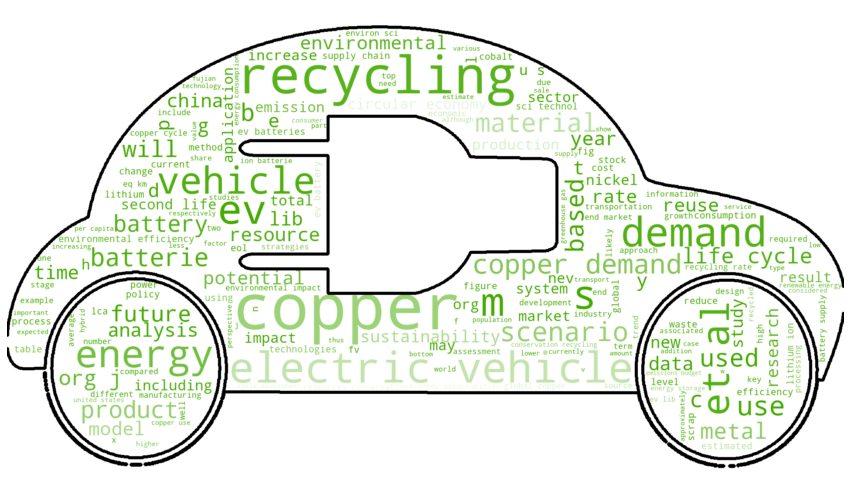

In [373]:


mask_2=np.array(Image.open('EV_image_3.png'))
mask_colors = ImageColorGenerator(mask_2)
wc = WordCloud(width = 800, height = 800,
                background_color ='white',
                mask=mask_2, contour_color='black', contour_width=10,
                stopwords = stopwords,color_func=mask_colors,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image   
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

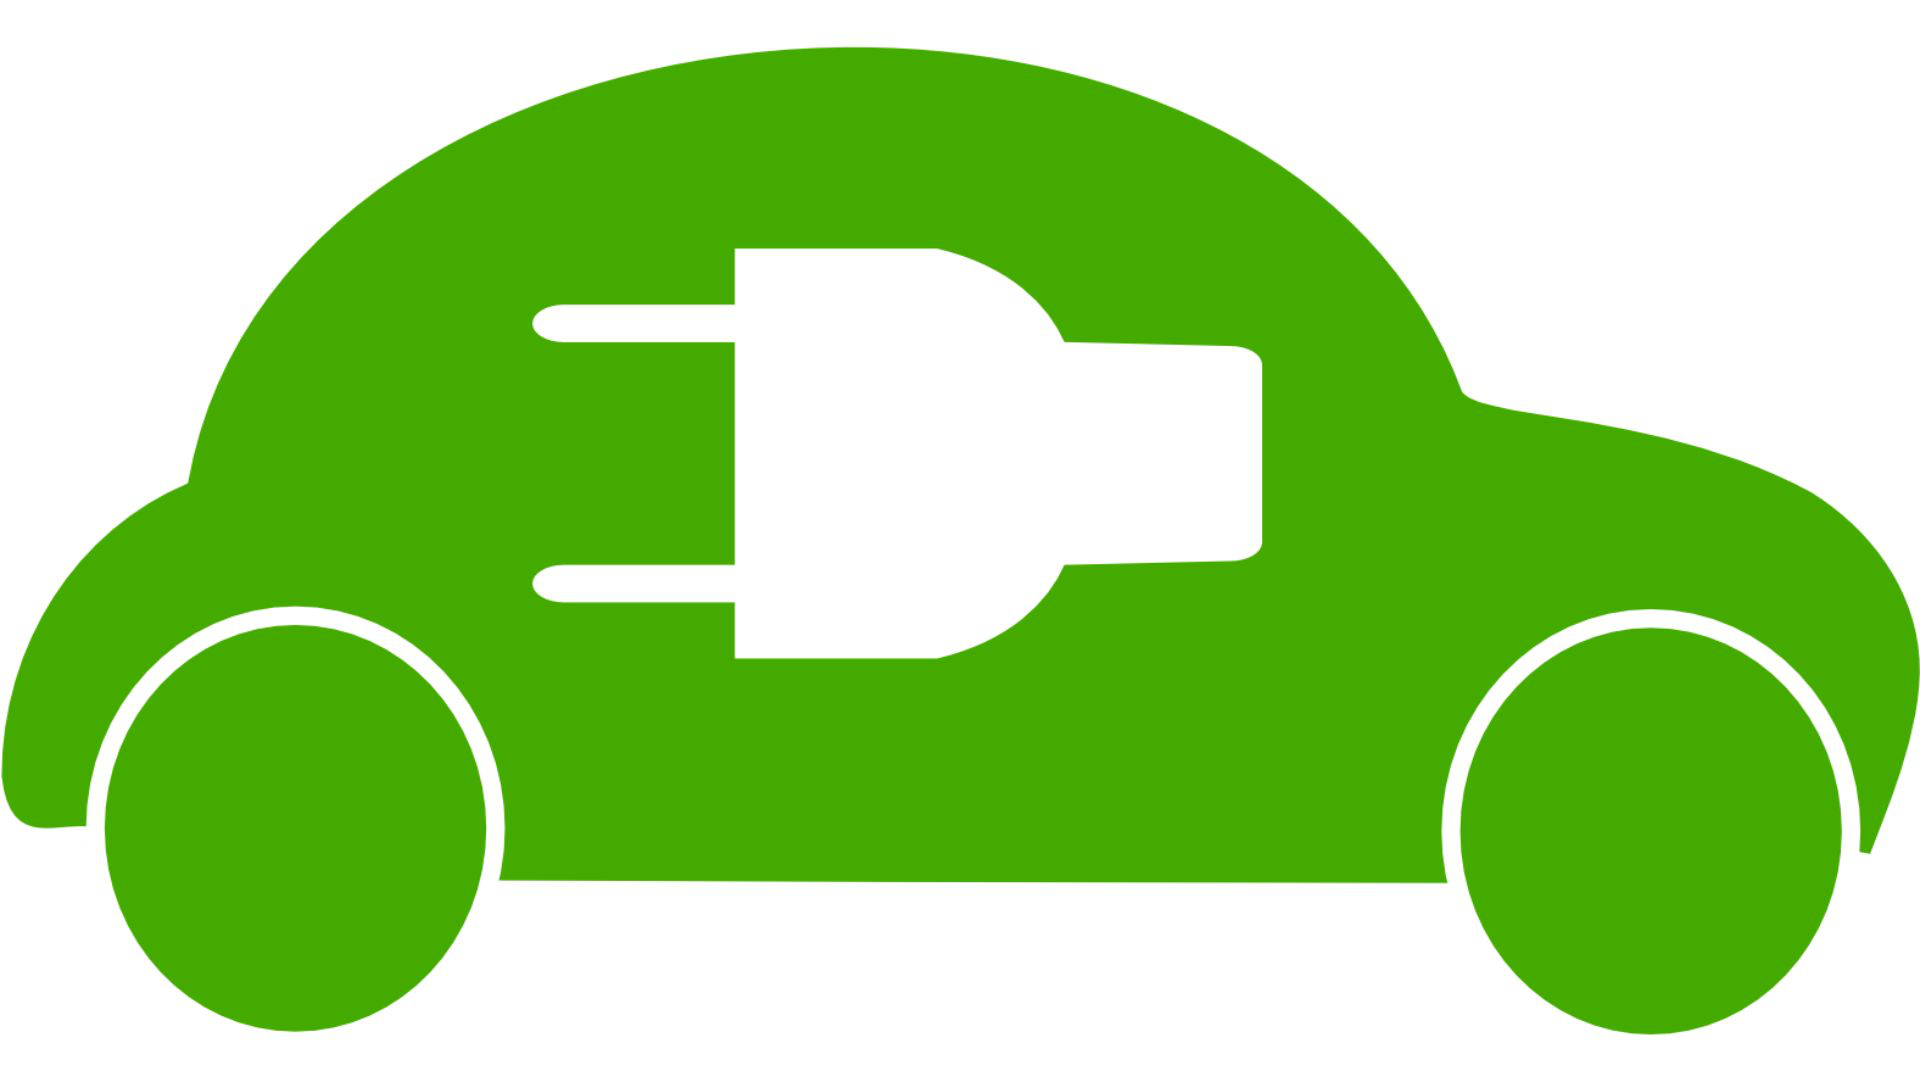

In [315]:
Image.open('EV_image.jpg')

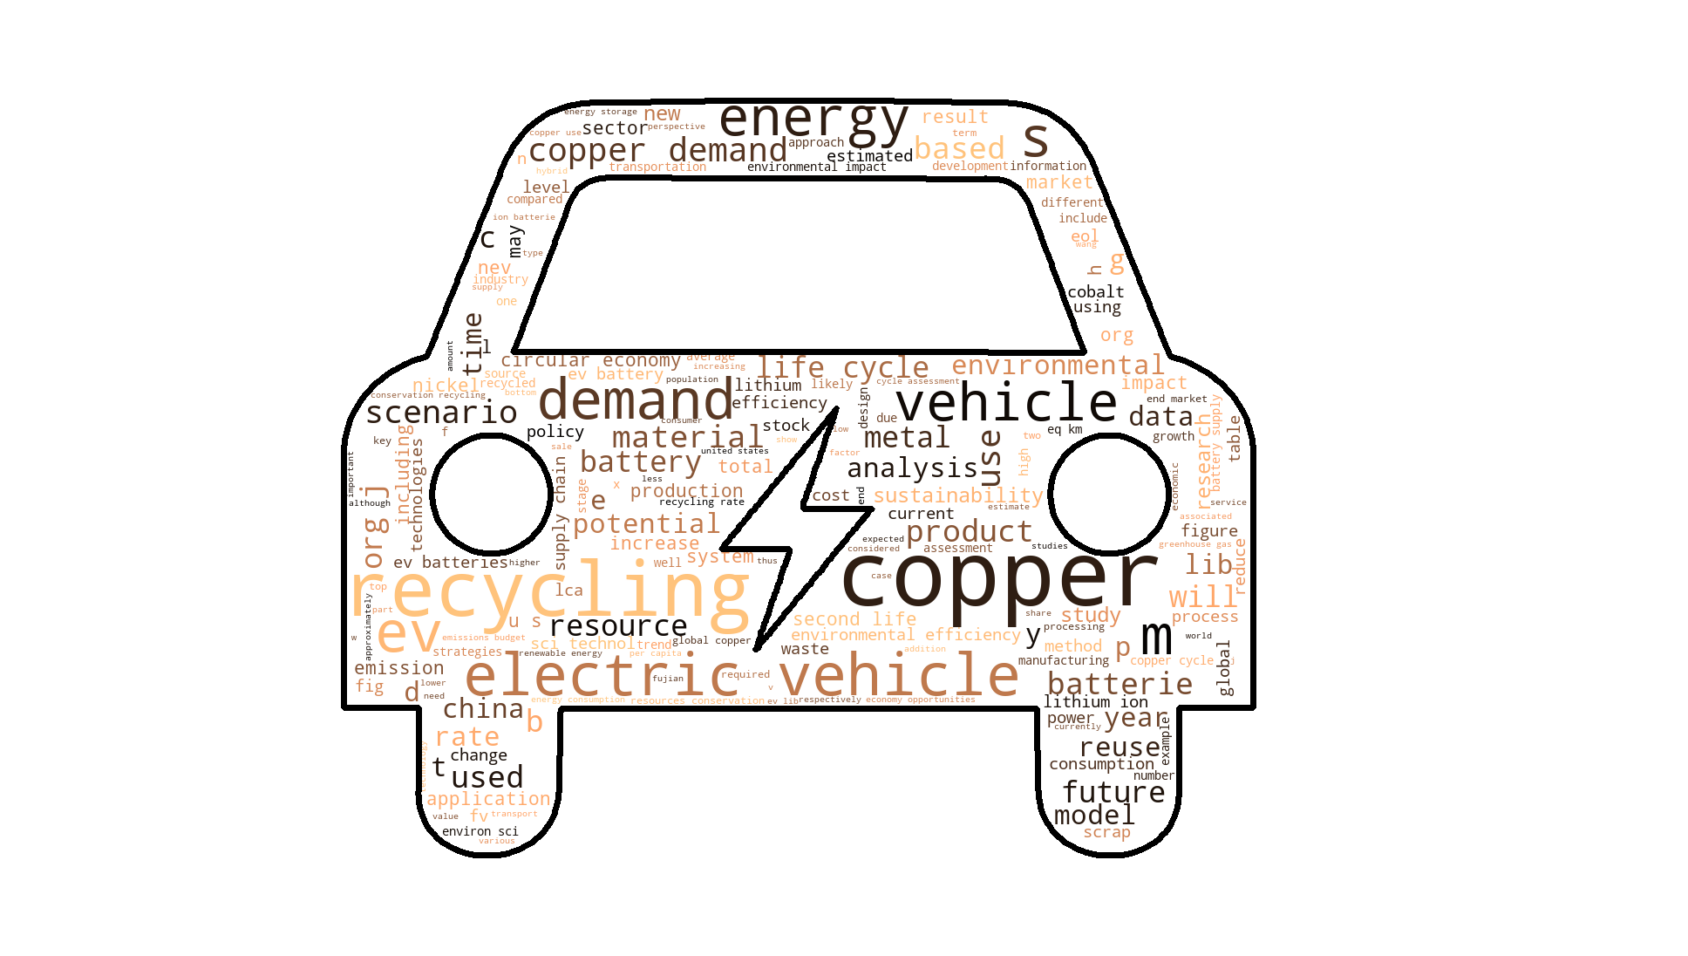

In [391]:

mask=np.array(Image.open('EV_image_4.png'))
wc = WordCloud(width = 1042, height = 864,
                background_color ='white',
                colormap='copper_r',
                mask=mask,contour_color='black', contour_width=10,
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image   
plt.figure(figsize=(30,20))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.savefig('science-wordcloud.png',transparent=True)
plt.show()

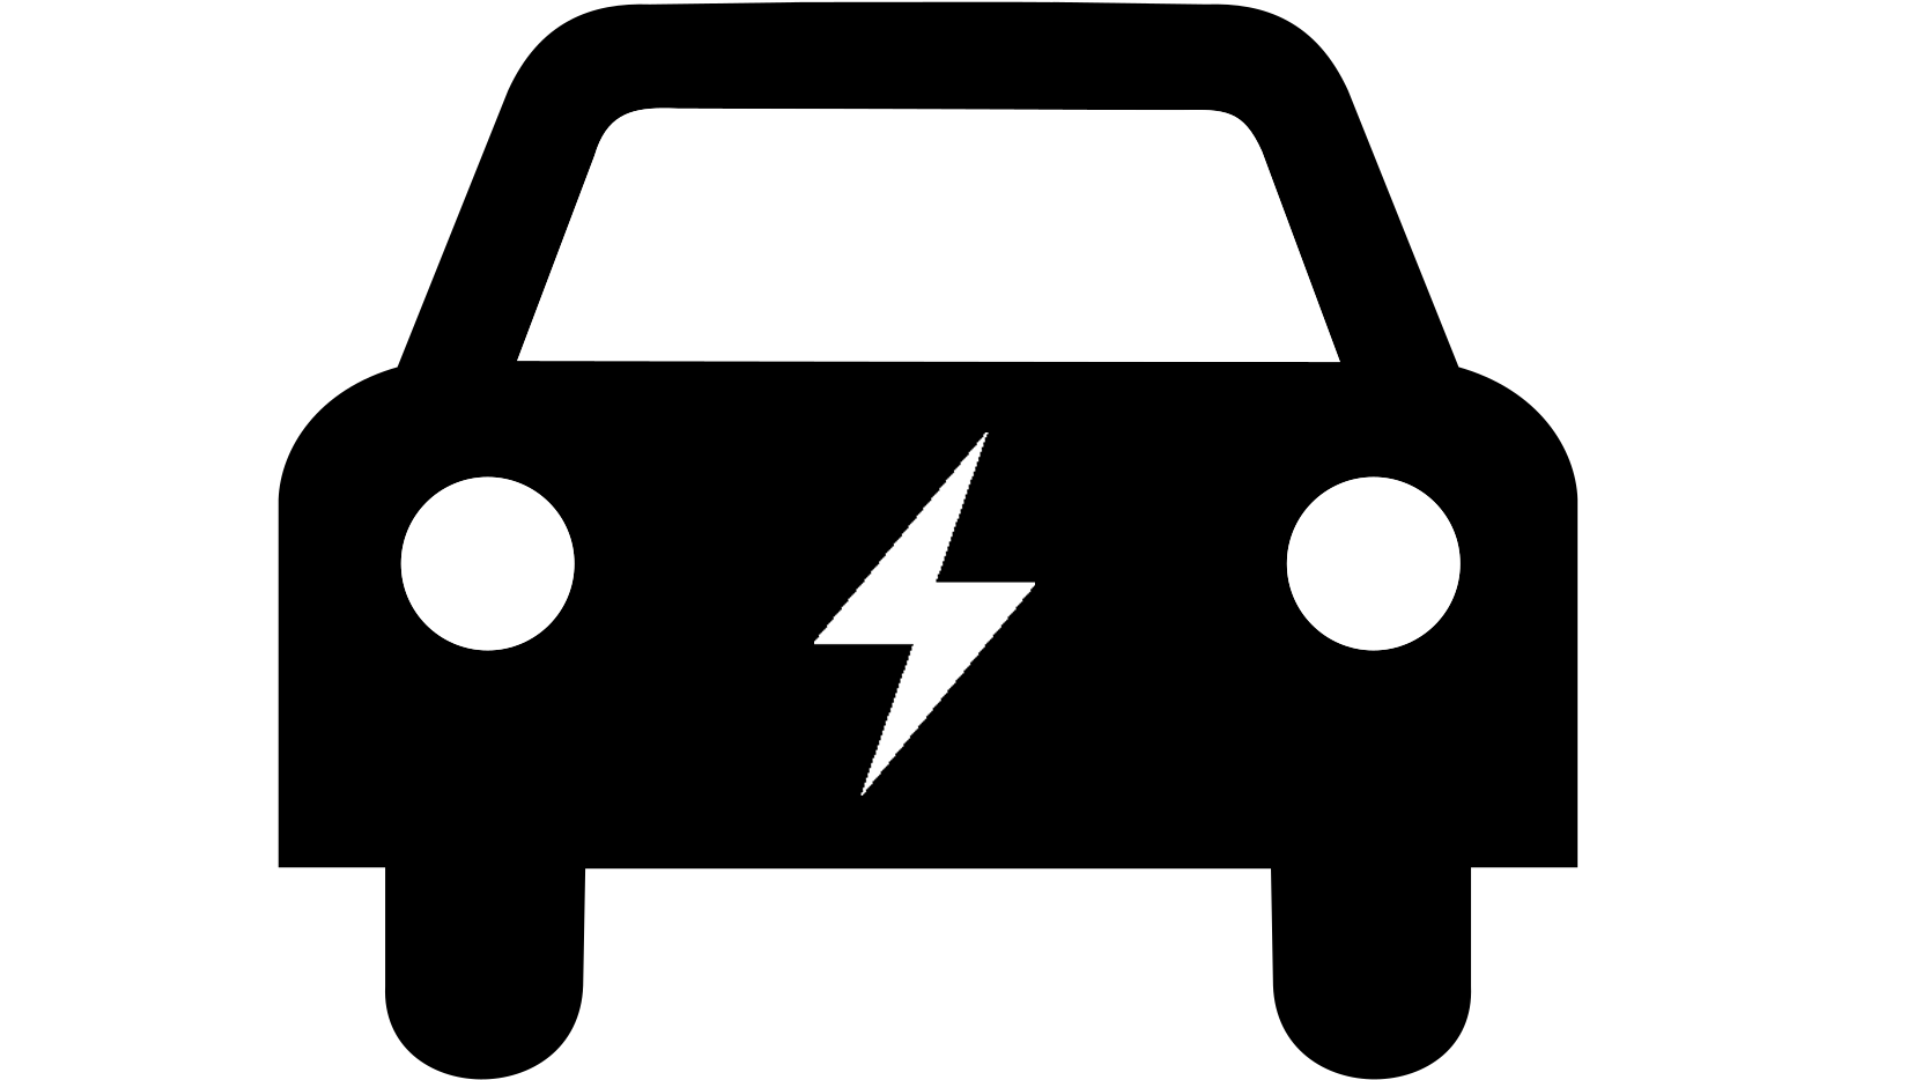

In [316]:
Image.open('EV_image_2.png')